In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir 
import muon as mu

In [9]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.13


In [10]:
mdata = mu.read("/Users/jerryaaaaaa/scTCR_merged_res0.2.h5mu")

In [11]:
#Identify frequent T-cell clone
clone_counts = mdata["airr"].obs["clone_id"].value_counts()
frequent_clones = clone_counts[clone_counts >= 5].index.tolist()
mdata_filtered = mdata[mdata["airr"].obs["clone_id"].isin(frequent_clones)].copy()

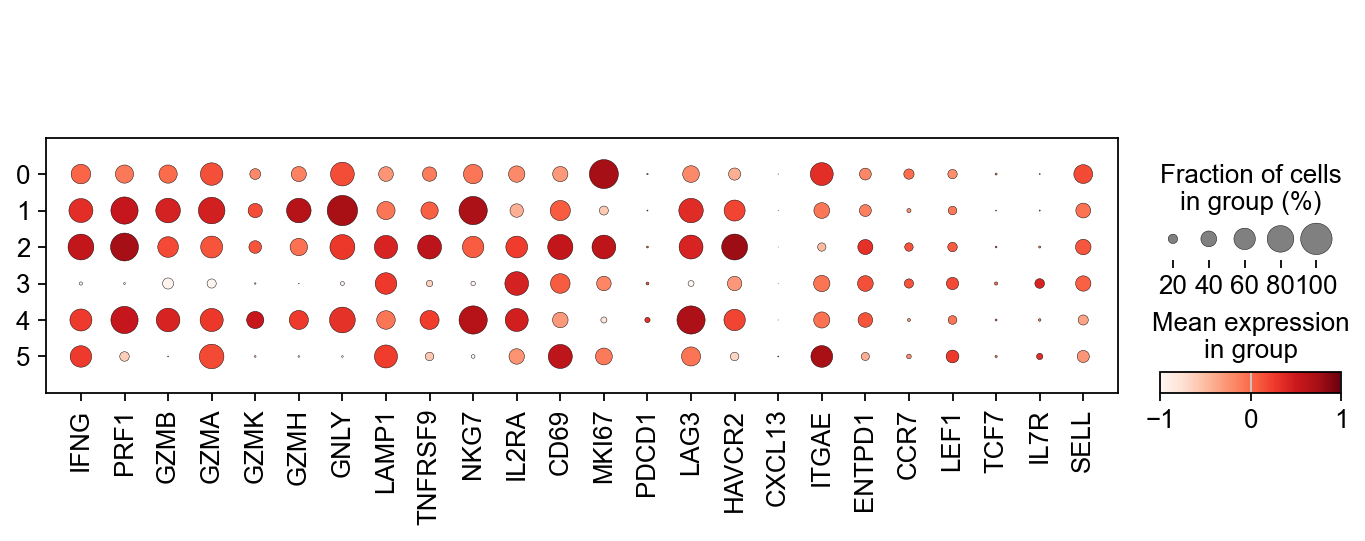

In [41]:
sc.pl.dotplot(
    mdata_filtered["gex"],
    var_names=["IFNG", "PRF1", "GZMB", "GZMA", "GZMK", "GZMH", "GNLY", "LAMP1", "TNFRSF9", "NKG7", "IL2RA", "CD69", "MKI67", "PDCD1", "LAG3", "HAVCR2", "CXCL13", "ITGAE", "ENTPD1", 
    "CCR7", "LEF1", "TCF7", "IL7R", "SELL"],
    groupby="leiden",
    use_raw=False,
    vmax=1,
    vmin=-1
)

In [33]:
cognate_stim_genes = ["IFNG", "PRF1", "GZMB", "GZMA", "GZMK", "GZMH", "GNLY", "LAMP1", "TNFRSF9", "NKG7", "IL2RA", "CD69", "MKI67", "PDCD1", "LAG3", "HAVCR2", "CXCL13", "ITGAE", "ENTPD1"]

In [16]:
sc.tl.score_genes(mdata_filtered["gex"], cognate_stim_genes, score_name="reactivity_score")

computing score 'reactivity_score'
    finished: added
    'reactivity_score', score of gene set (adata.obs).
    254 total control genes are used. (0:00:00)


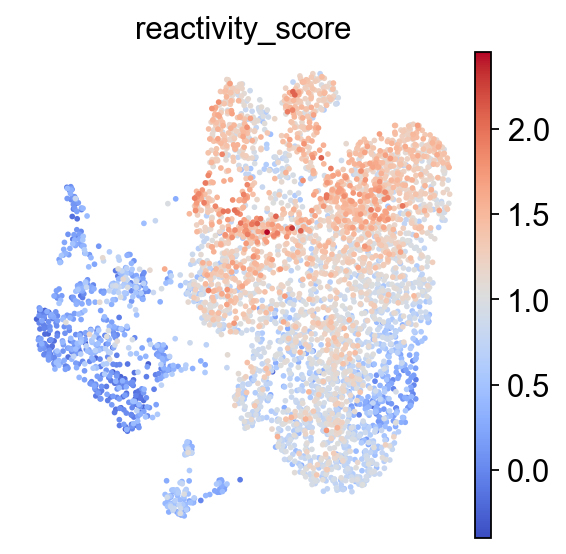

In [20]:
sc.pl.umap(mdata_filtered["gex"], color="reactivity_score", frameon=False, cmap="coolwarm")

In [21]:
mmdata = mu.read("/Users/jerryaaaaaa/tcr_model.h5mu")

In [37]:
mmdata["gex"].obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,clone_id,clonal_dynamic_label,clonal_dynamic,expansion_fold,alpha_cdr3_aa,beta_cdr3_aa,alpha_cdr3_len,beta_cdr3_len,clonal_abundance,enriched_tier,reactivity_score
AAACCTGAGAATGTTG-1,7719,7714,59153.0,276.0,0.466587,0,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,0.188347
AAACCTGAGGTAGCTG-1,3443,3443,9105.0,33.0,0.362438,1,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,1.477983
AAACCTGAGTAGATGT-1,3740,3740,11302.0,92.0,0.814015,4,1,1.0,Enriched,4.414,APLGNEKLT,ASSYYRPTGPYEQY,9,14,219,Tier_4,1.305020
AAACCTGAGTGGAGTC-1,3287,3286,9576.0,55.0,0.574353,1,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,1.320357
AAACCTGCAGACAAGC-1,3016,3016,8776.0,100.0,1.139471,1,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,1.487265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATCGACGC-1,1980,1980,4300.0,75.0,1.744186,1,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,1.612368
TTTGTCAGTTGGAGGT-1,5410,5409,26259.0,232.0,0.883507,0,0,1.0,Enriched,18.141,AMPVVDLLTGGADGLT,ASSVEPQLAGRGDTQY,16,16,2879,Tier_3,0.691086
TTTGTCATCACAACGT-1,6239,6238,30520.0,238.0,0.779817,3,111,1.0,Enriched,104.145,ATVPMFSGGYNKLI,ASTLLRGEQF,14,10,12,Tier_2,0.928035
TTTGTCATCCAAATGC-1,2543,2542,4771.0,110.0,2.305596,3,3,1.0,Enriched,164.062,ATQLYNARLM,ASSARGTKNIQY,10,12,172,Tier_2,0.913199


In [26]:
mmdata["gex"].obs.drop(columns=["reactivity_score", "clone_reactivity_score"], inplace=True)

In [36]:
sc.tl.score_genes(mmdata["gex"], cognate_stim_genes, score_name="reactivity_score")

computing score 'reactivity_score'
    finished: added
    'reactivity_score', score of gene set (adata.obs).
    254 total control genes are used. (0:00:00)


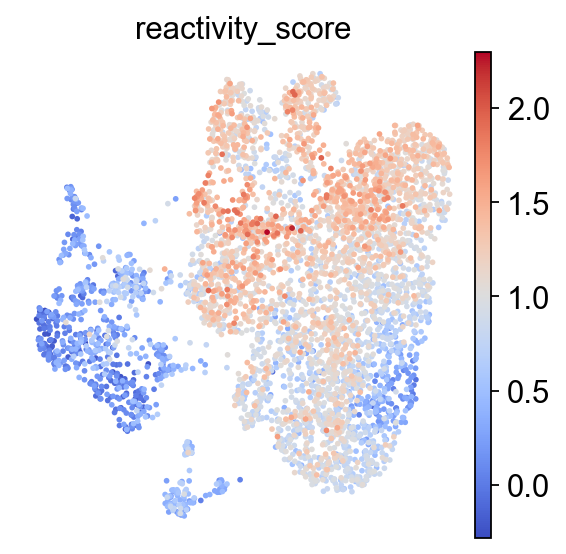

In [38]:
sc.pl.umap(mmdata["gex"], color="reactivity_score", frameon=False, cmap="coolwarm")

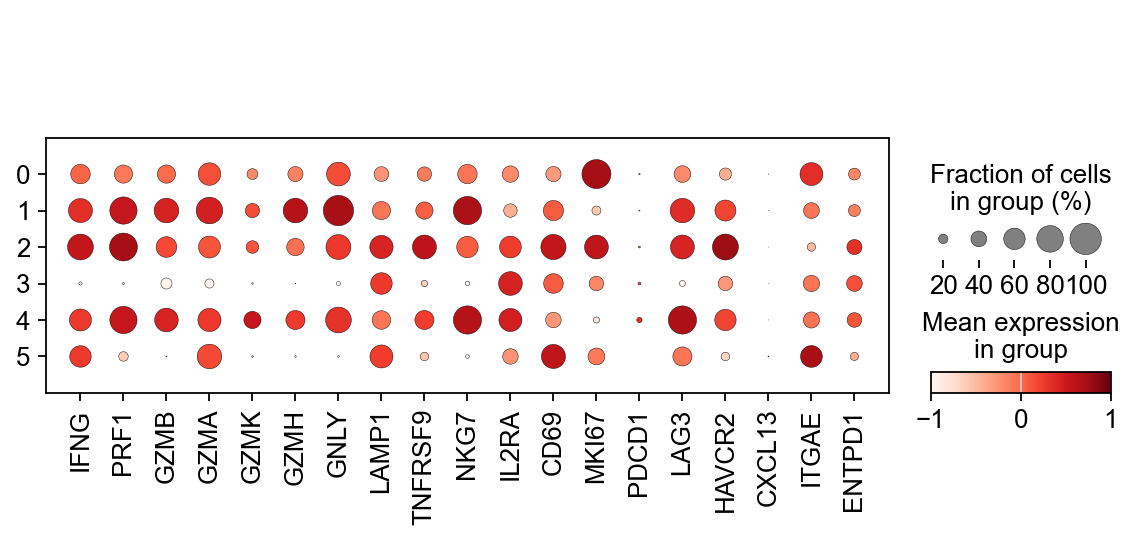

In [42]:
sc.pl.dotplot(
    mmdata["gex"],
    var_names=["IFNG", "PRF1", "GZMB", "GZMA", "GZMK", "GZMH", "GNLY", "LAMP1", "TNFRSF9", "NKG7", "IL2RA", "CD69", "MKI67", "PDCD1", "LAG3", "HAVCR2", "CXCL13", "ITGAE", "ENTPD1"],
    groupby="leiden",
    use_raw=False,
    vmax=1,
    vmin=-1
)

In [39]:
mmdata.write("/Users/jerryaaaaaa/tcr_model_2.h5mu")

In [47]:
clone_expand_df = mmdata["gex"].obs["clone_id"].value_counts().reset_index()
clone_expand_df.columns = ["clone_id", "abundance"]

In [48]:
clone_expand_df

,clone_id,abundance
0,0,2879
1,2,486
2,1,219
3,3,172
4,5,96
5,6,80
6,12,61
7,8,38
8,31,32
9,54,27


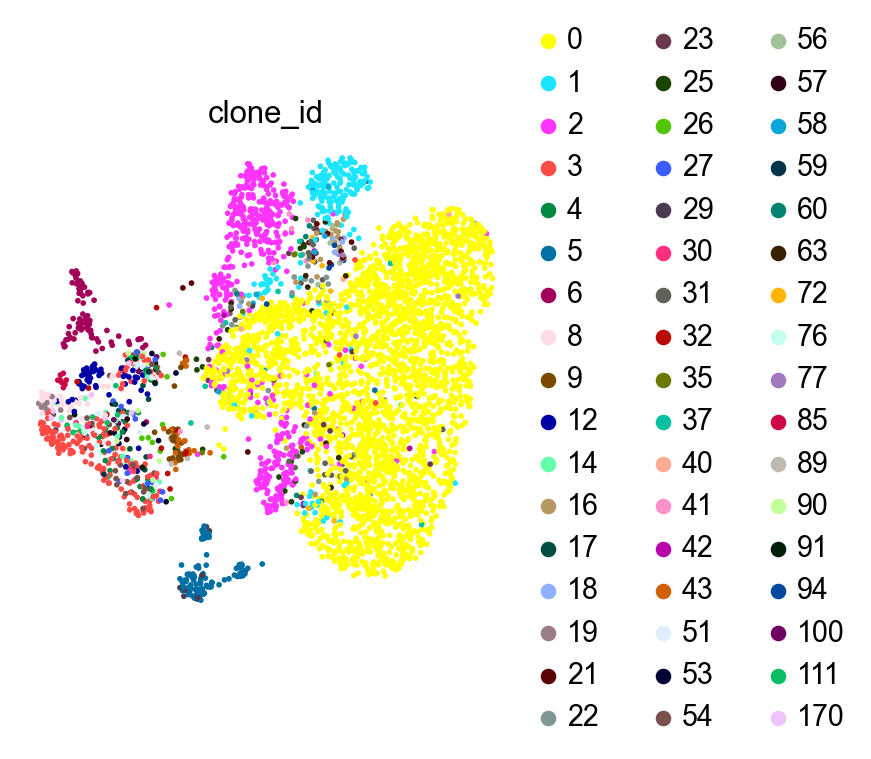

In [49]:
sc.pl.umap(mmdata["gex"], color="clone_id", frameon=False)